<div style="width: 100%; clear: both;">
<div style="float: left; width: 50%;">
<img src="http://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/UOC_Masterbrand.jpg" align="left">
</div>
<div style="float: right; width: 50%;">
<p style="margin: 0; padding-top: 22px; text-align:right;">M2.955 · Models avançats de mineria de dades · PAC1</p>
<p style="margin: 0; text-align:right;">2018-2 · Màster universitari en Ciència de dades (Data science)</p>
<p style="margin: 0; text-align:right; padding-button: 100px;">Estudis de Informàtica, Multimèdia i Telecomunicacions</p>
</div>
</div>
<div style="width:100%;">&nbsp;</div>


# PAC 1: Preparació de dades

Al llarg d'aquesta pràctica veurem com aplicar diferents tècniques per a la càrrega i preparació de dades:

 <ol start="1">
  <li>Càrrega de conjunts de dades</li>
  <li>Anàlisis de les dades
  <br>2.1 Anàlisis estadístic bàsic
  <br>2.2 Anàlisis exploratori de les dades
  <li>Reducció de la dimensionalitat</li>
  <li>Aplicació de CART</li>
</ol>
   
Per a això necessitarem les següents llibreries:

In [14]:
from sklearn import datasets
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.set_option('display.max_columns', None)

# 1. Càrrega de conjunts de dades (1 punt)

En primer lloc, heu de carregar el conjunt de dades Breast Cancer Wisconsin (més informació a l'enllaç https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)). Es pot descarregar d'Internet o es pot carregar directament desde la llibreria "scikit-learn", que incorpora un conjunt de datasets molt coneguts i usats per a la mineria de dades i machine learning (http://scikit-learn.org/stable/datasets/index.html).

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementació:</strong> Carregueu el conjunt de dades "Breast Cancer Wisconsin" i mostreu el número i nom dels atributs (variables que podrien ser usades per a predir la resposta "Diagnosis"), així com el número de files obtingudes.
<hr>
Suggeriment: si useu sklearn (sklearn.datasets.load_breast_cancer), exploreu les diferents 'keys' de l'objecte obtingut.
</div>

In [24]:
# ----------------> IMPORTANT <----------------
# -> Per a la realitzacio d'aquesta PAC s'ha utiltizat la seguent bibliografia:
# Introduction to machine learning with Python : a guide for data scientists (bibliografia recomanada al Pla Docent)
#
# -> S'ha utilitzat el valor de la variable random_state=6 per tal de crear solucions reproduibles, fet que
# pot implicar resultats relativament diferents per altres valors de la variable 'random_state'. Factor a tenir
# en compte a l'hora de compar resultats
#
# -> S'ha utilitzat un valor de la variable test_size=0.33. Altres valors d'aquesta variable implicarien resultats
# relativament diferents. Factor a tenir en compte a l'hora de comparar resultats

from sklearn.datasets import load_breast_cancer

cancer=load_breast_cancer()

# Explora les diferents keys de l'objecte cancer
#print("Les 'keys' de l'objecte 'cancer' son: ",cancer.keys())

# Mostra el nombre d'atributs
print("El nombre d'atributs és:",len(cancer['feature_names']),"\n")

# Mostra el nom dels atributs
print("El nom dels atributs és:\n{}".format(cancer['feature_names']),"\n")

# Mostra el nombre de files/instancies obtingudes
print("El nombre de files obtingudes és:",len(cancer['data']))

El nombre d'atributs és: 30 

El nom dels atributs és:
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension'] 

El nombre de files obtingudes és: 569


# 2. Anàlisis de les dades

## 2.1 Anàlisis estadístic bàsic (1 punt)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementació:</strong> Realitzeu un anàlisis estadístic bàsic indicant, per a cada atribut numèric del conjunt de dades, el seu valor mitjà i la seva desviació estàndard. Per a les variables categòriques (en els atributs o la resposta, si ho són), mostreu la frequència amb la qual apareixen les diferents classes.
<hr>
Suggeriment: podeu usar la llibreria 'pandas' i les seves funcions 'describe' i 'value_counts'
</div>

In [26]:
# Carrega les dades a un DataFrame
X=pd.DataFrame(data=cancer['data'],columns=cancer['feature_names'])
y=cancer['target']

# Mostra les principals caracteristiques dels atributs numerics, entre elles la mitjana aritmetica(mean) i la
# desviacio estandard (std)
# Tots els atributs són numerics
display(X.describe())

print()

# Crea el diccionari amb les diferents categories i el seu comptatge de la resposta
dict_compt={n: v for n,v in zip(cancer.target_names,np.bincount(cancer['target']))}

#print("Comptatge segons classe de la variable categorica de resposta:", dict_compt)

print("Frequencia de cada classe de la variable categorica de resposta:")

for n,v in dict_compt.items():
    print("\t'{0}': \t{1:.3f}".format(n,v/len(cancer['target'])))


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500



Frequencia de cada classe de la variable categorica de resposta:
	'malignant': 	0.373
	'benign': 	0.627


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisis:</strong> Comenteu els resultats.
</div>

## 2.2 Anàlisis exploratori de les dades (3 punts)

En aquest exercici explorarem la relació d'alguns dels atributs numèrics amb la variable resposta ("Diagnosis"), tant gràficament com quantitativament. Per començar, seleccioneu els 4 atributs que voleu explorar. Si esteu usant els noms de columnes proporcionats per sklearn, una llista de possibles noms d'atributs seria:

In [17]:
feats_to_explore = ['mean radius', 'mean texture', 'mean smoothness', 'mean symmetry']

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementació:</strong> Utilitzant una llibreria gràfica, com per exemple "matplotlib", realitzeu un gràfic de l'histograma de valors per a cada un dels atributs seleccionats, separats pels valors de classe de la resposta ("Diagnosis"). La finalitat és observar com es distribueix cadascun dels atributs en funció del valor de classe que tinguin, per a poder identificar de forma visual i ràpida si alguns atributs permeten diferenciar de forma clara els diferents diagnòstics dels tumors.
</div>

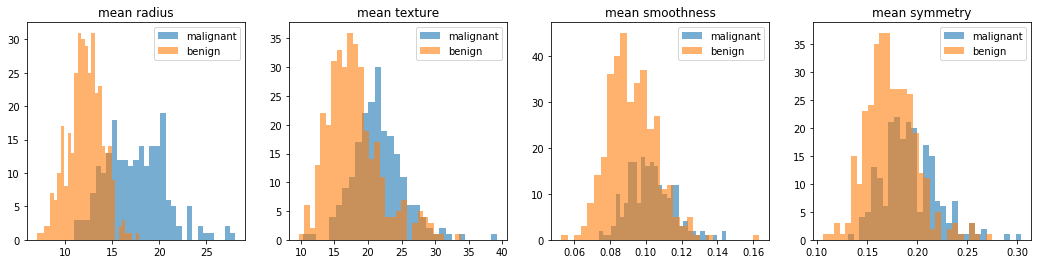

In [18]:
fig,axes=plt.subplots(1,4,figsize=(18,4))

for i,feature in enumerate(feats_to_explore):
    axes[i].hist(X[y==0][feature], bins=30,alpha=0.6,label=cancer['target_names'][0])
    axes[i].hist(X[y==1][feature], bins=30,alpha=0.6,label=cancer['target_names'][1])
    axes[i].set_title(feature)
    axes[i].legend()

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementació:</strong> Per a cada un dels atributs representats en l'exercici anterior, mostreu la mitjana i la desviació estàndard per a cada valor de classe de la resposta ("Diagnosis"). La finalitat és verificar numèricament les diferències identificades anteriorment de forma visual.
</div>

In [28]:
res=[]
for i in range(2):
    res.append(X[y==i][feats_to_explore].mean())
    res.append(X[y==i][feats_to_explore].std())
arr=pd.DataFrame(data=res,index=[['malignant','malignant','benign','benign'],['mean','std','mean','std']])
display(arr)

mean radius  mean texture  mean smoothness  mean symmetry
malignant mean    17.462830     21.604906         0.102898       0.192909
          std      3.203971      3.779470         0.012608       0.027638
benign    mean    12.146524     17.914762         0.092478       0.174186
          std      1.780512      3.995125         0.013446       0.024807

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisis:</strong>
<br> - Mirant els gràfics, quins atributs et sembla que tenen valors clarament diferents per a diagnòstics benignes i malignes? Quins atributs no?
<br> - Mirant els valors mitjans i les desviacions estàndard calculades, et semblen significatives les diferències per a diagnòstics benignes i malignes?
<br> - BONUS: quin test estadístic podries usar per comparar les distribucions dels valors dels atributs quan els diagnòstics són benignes o malignes? Usa'l per evaluar quins atributs (d'entre tots els del conjunt de dades) tenen valors més semblants en tumors benignes i malignes. Interpreta el resultat.
</div>

In [39]:
import scipy.stats

# Calcula les variables per a diagnosis maligne
x1_mean=X[y==0].mean()
x1_std=X[y==0].std()
n1=sum(y==0)

# Calcula les variables per a diagnosis benigne
x2_mean=X[y==1].mean()
x2_std=X[y==1].std()
n2=sum(y==1)

# Calcula l'estadistic de contrast que, segons el teorema del limit central, segueix aproximadament una N(0,1)
s_x1x2=np.sqrt(x1_std**2/n1+(x2_std**2/n2))
z=(x1_mean-x2_mean)/s_x1x2

# Suposant un nivell de significacio igual a 'nivelll_sig' obtenim un 'z_contr', tal que,
# implica que les dues distribucions no son significativament diferents sempre que z_contr>z>-z_contr
nivell_sig=0.01
z_contr=abs(scipy.stats.norm(0,1).ppf(nivell_sig/2))


print("Els atributs que no són significativament diferents (per un nivell de significació de {}) són:"
     .format(nivell_sig))

contrast=pd.DataFrame(z[abs(z)<z_contr],columns=['Valor estadistic contrast'])
contrast.index.name='Atributs no significativament diferents (alpha='+str(nivell_sig)+')'
display(contrast)

Els atributs que no són significativament diferents (per un nivell de significació de 0.01) són:


,Valor estadistic contrast
Atributs no significativament diferents (alpha=0.01),
mean fractal dimension,-0.296866
texture error,-0.207865
smoothness error,-1.622869
symmetry error,-0.142055
fractal dimension error,2.036236


# 3. Reducció de la dimensionalitat (2 punts)

En aquest exercici hauràs d'aplicar mètodes de reducció de la dimensionalitat al conjunt original de dades. L'objectiu és reduïr el conjunt d'atributs a un nou conjunt amb menys dimensions.

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementació:</strong> Apliqueu els mètodes de reducció de la dimensionalitat:
<br>- Principal Component Analysis (PCA)
<br>- t-distributed Stochastic Neighbor Embedding (t-SNE)
<br>per a reduïr el conjunt de dades a 2 dimensions.

<hr>
Suggeriment: No és necessari que programeu els algorismes, poder usar les implementacions disponibles en la llibreria "scikit-learn".
</div>

In [21]:
# Reduccio a 2 dimensions utilitzant PCA
pca=PCA(n_components=2)
X_pca=pca.fit_transform(X)

# Reduccio a 2 dimensions utilitzant t-SNE
tsne=TSNE(random_state=6)
X_tsne=tsne.fit_transform(X)

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementació:</strong> Genereu un gràfic (en 2D) amb el resultat de cada un dels mètodes de reducció de les dimensions, usant colors diferents per a cada classe de la resposta, amb l'objectiu de visualitzar si és possible separar eficientment les classes usant aquests mètodes.</div>

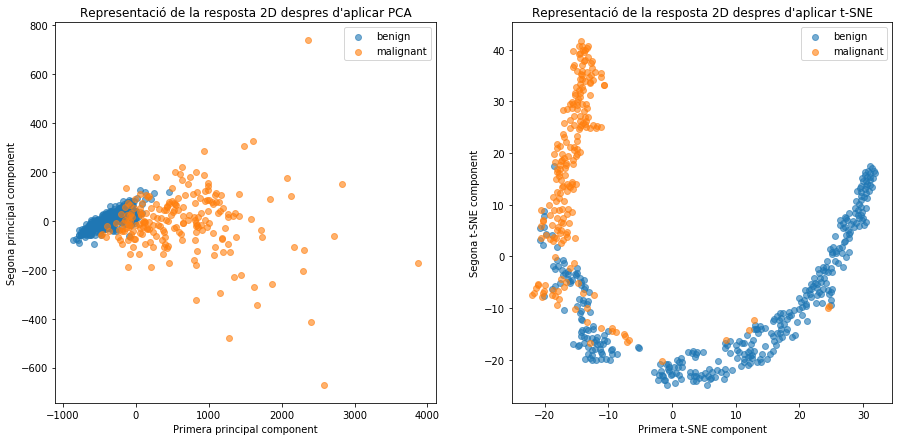

In [22]:
fig,axes=plt.subplots(1,2,figsize=(15,7))

# Dibuixa el resultat d'aplicar el metode PCA
axes[0].scatter(X_pca[cancer['target']==1][:,0],X_pca[cancer['target']==1][:,1],
            label=cancer['target_names'][1],alpha=0.6)
axes[0].scatter(X_pca[cancer['target']==0][:,0],X_pca[cancer['target']==0][:,1],
            label=cancer['target_names'][0],alpha=0.6)
axes[0].legend()
axes[0].set_xlabel("Primera principal component")
axes[0].set_ylabel("Segona principal component")
axes[0].set_title("Representació de la resposta 2D despres d'aplicar PCA")

# Dibuixa el resultat d'aplicar el metode t-SNE
axes[1].scatter(X_tsne[cancer['target']==1][:,0],X_tsne[cancer['target']==1][:,1],
            label=cancer['target_names'][1],alpha=0.6)
axes[1].scatter(X_tsne[cancer['target']==0][:,0],X_tsne[cancer['target']==0][:,1],
            label=cancer['target_names'][0],alpha=0.6)
axes[1].legend()
axes[1].set_xlabel("Primera t-SNE component")
axes[1].set_ylabel("Segona t-SNE component")
axes[1].set_title("Representació de la resposta 2D despres d'aplicar t-SNE");

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisis:</strong>
<br> - Quin mètode de reducció de la dimensionalitat ha resultat més efectiu per a visualitzar les dues classes de diagnòstic de forma separada?
<br> - BONUS: quan és més apropiat usar PCA o t-SNE?
</div>

# 4. Aplicació de CART (3 punts)

En aquest últim exercici es tracta d'aplicar un mètode d'aprenentatge supervisat, concretament els arbres de decisió, per a predir el diagnòstic de càncer de mama (tumor benigne o maligne) i evaluar la precisió obtinguda amb el model, usant:

- El conjunt de dades original amb tots els atributs
- El conjunt de dades reduït a només 2 atributs amb el mètode PCA

<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Implementació:</strong> Entreneu dos models usant arbres de decisió (amb una profunditat màxima limitada a 3 nivells per a mantenir el model simple): un usant el conjunt de dades original i l'altre usant el conjunt de dades reduït amb PCA.
<br>Calculeu la precisió de les prediccions obtingudes per cadascun dels models (accuracy) així com la matriu de confusió associada.
<hr>
Suggeriment: és necessari que genereu un conjunt de dades d'entrenament per a calibrar el model, i un altre conjunt de test per a evaluar la bondat de cadascun dels models creats. Podeu usar els mòduls 'train_test_split', 'DecisionTreeClassifier' i les funcions dins del mòdul 'metrics' de sckit-learn.
</div>

In [23]:
## Amb el conjunt de dades original
# Genera el conjunt de dades d'entrenament i de test (amb la proporcio: 2/3 entrenament i 1/3 test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=6)

clf=DecisionTreeClassifier(random_state=6,max_depth=3)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

print("-> Resultat utilitzant les dades originals:")
print("Accuracy: {:.3f}".format(accuracy_score(y_test,y_pred)))
print("Matriu de confusió associada:\n{}".format(confusion_matrix(y_test,y_pred)))
print()

## Amb el conjunt de dades reduit amb PCA
# Genera el conjunt de dades d'entrenament i de test (amb la proporcio: 2/3 entrenament i 1/3 test)
X_pca_train, X_pca_test, y_pca_train, y_pca_test = train_test_split(X_pca, y, test_size=0.33, random_state=6)

clf.fit(X_pca_train,y_pca_train)
y_pca_pred=clf.predict(X_pca_test)

print("-> Resultat utilitzant les dades reduïdes emprant PCA:")
print("Accuracy: {:.3f}".format(accuracy_score(y_pca_test,y_pca_pred)))
print("Matriu de confusió associada:\n{}".format(confusion_matrix(y_pca_test,y_pca_pred)))

-> Resultat utilitzant les dades originals:
Accuracy: 0.931
Matriu de confusió associada:
[[ 73   8]
 [  5 102]]

-> Resultat utilitzant les dades reduïdes emprant PCA:
Accuracy: 0.936
Matriu de confusió associada:
[[ 70  11]
 [  1 106]]


<div style="background-color: #EDF7FF; border-color: #7C9DBF; border-left: 5px solid #7C9DBF; padding: 0.5em;">
<strong>Anàlisis:</strong>
<br> - Amb quin tipus de dades (originals o reduïdes) has obtingut una millor precisió (accuracy)?
<br> - Si l'usuari del model de predicció, un hospital per exemple, volgués usar el model amb el menor número de tumors malignes erròniament classificats com a benignes, quin dels dos models hauria de fer servir? Perquè?
<br> - I si l'hospital volgués usar el model amb el menor número de tumors benignes erròniament classificats com a malignes, quin dels dos models hauria de fer servir? Perquè?
</div>